In [ ]:
from zipfile import ZipFile

filename = "plant_images.zip"

with ZipFile(filename, 'r') as zip:
    zip.extractall()

print("done")

done


In [ ]:
#prerequisites

from zipfile import ZipFile
import os
import matplotlib.pyplot as plt
import random
import numpy as np

IMAGE_WIDTH=200
IMAGE_HEIGHT=200
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color
batch_size=1

In [ ]:
#create the data source for training and validation data

from keras.preprocessing.image import ImageDataGenerator

dir = 'plant_images'

gen = ImageDataGenerator( 
    rescale=1./255,
    shear_range=0.2,  
    zoom_range=0.2,        
    horizontal_flip=True,
    validation_split=0.2
    )  

train = gen.flow_from_directory(
    dir,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'binary',
    subset='training'
    )

validation = gen.flow_from_directory(
    dir,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'binary',
    subset='validation'
    ) 



from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense ,BatchNormalization
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint

TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
MODEL_FILE = "model.h5"
Checkpoint_file = "checkpoint_best_weights.hdf5"

Using TensorFlow backend.


Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
# Model 
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

print('model created')













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
model created


In [ ]:
# training the model

history = model.fit_generator(
    train, 
    steps_per_epoch  = train.samples // batch_size,
    epochs = 6, 
    verbose = 1,
    validation_data = validation, 
    validation_steps = validation.samples // batch_size,
)
print('model trained')



Epoch 1/6
200/200 [==============================] - 12s 58ms/step - loss: 0.6594 - acc: 0.8400 - val_loss: 3.5354 - val_acc: 0.7800
Epoch 2/6
200/200 [==============================] - 7s 35ms/step - loss: 0.5997 - acc: 0.8400 - val_loss: 2.8977 - val_acc: 0.8200
Epoch 3/6
200/200 [==============================] - 7s 35ms/step - loss: 0.5509 - acc: 0.8400 - val_loss: 3.2166 - val_acc: 0.8000
Epoch 4/6
200/200 [==============================] - 7s 36ms/step - loss: 0.5111 - acc: 0.8400 - val_loss: 2.8977 - val_acc: 0.8200
Epoch 5/6
200/200 [==============================] - 7s 35ms/step - loss: 0.4847 - acc: 0.8400 - val_loss: 2.8942 - val_acc: 0.8200
Epoch 6/6
200/200 [==============================] - 7s 35ms/step - loss: 0.4661 - acc: 0.8400 - val_loss: 4.4885 - val_acc: 0.7200
model trained


In [ ]:
#saving the model in file
from keras.models import load_model
model.save('my_model.h5')

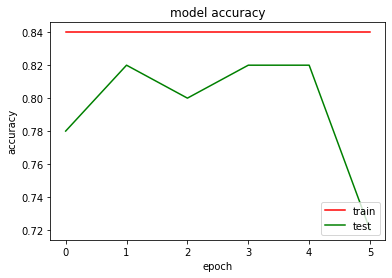

In [ ]:
# accuracy vs epoch graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(history.history['acc'], color='red')
ax.plot(history.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

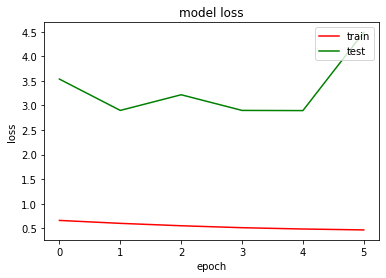

In [ ]:
# loss vs epoch 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(history.history['loss'], color='red')
ax.plot(history.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
import matplotlib.image as mpimg
from keras.preprocessing import image

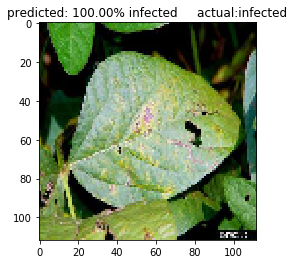

In [ ]:
# predicting about random image
test_data_dir = os.listdir(dir)
TrueLabel = random.choice(test_data_dir)
sample = random.choice(os.listdir(dir+"/"+TrueLabel))
path = dir+"/"+TrueLabel+"/"+sample
imag = image.load_img(path,target_size = IMAGE_SIZE)
imag = image.img_to_array(imag)
imag = np.expand_dims(imag,axis=0)
imag = imag/255
prob = model.predict(imag)

if prob > 0.5:
    plt.title("predicted: "+"%.2f" % (prob[0]*100) + "% uninfected " + "        actual:" + TrueLabel)
else:
    plt.title("predicted: "+"%.2f" % ((1-prob[0])*100) + "% infected "+ "    actual:" + TrueLabel)

    
   
plt.imshow(image.load_img(path,target_size=(112,112)))

Saving images (11).jpg to images (11).jpg
images (11).jpg


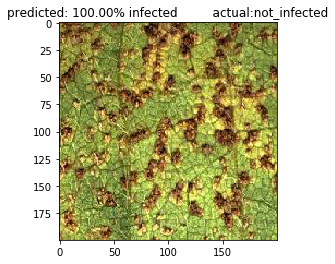

In [ ]:
from google.colab import files
import cv2
uploaded = files.upload()

for fn in uploaded.keys():  
  print(fn)
  img = image.load_img(fn,target_size=IMAGE_SIZE)
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  img = img/255
  prob = model.predict(img)
 
  if prob > 0.5:
      plt.title("predicted: "+"%.2f" % (prob[0]*100) + "% uninfected " + "        actual:" + TrueLabel)
  else:
      plt.title("predicted: "+"%.2f" % ((1-prob[0])*100) + "% infected "+ "        actual:" + TrueLabel)

  plt.imshow(image.load_img(fn,target_size=IMAGE_SIZE))